In [5]:
import numpy as np
import pandas as pd 
import pylab
from sklearn.metrics import pairwise_distances
from sklearn.manifold import TSNE

In [3]:
df = pd.read_csv('molecules.csv')
df["log(IGC50-1)"].loc[df["log(IGC50-1)"] <= 0] = 0
df["log(IGC50-1)"].loc[df["log(IGC50-1)"] > 0] = 1
X = df.drop(["mol_id", "log(IGC50-1)"],axis=1).to_numpy()
X = np.delete(X,np.where(X.max(axis=0) == 0)[0],axis=1)
X /= X.max(axis=0)

/tmp/ipykernel_25572/31824977.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["log(IGC50-1)"].loc[df["log(IGC50-1)"] <= 0] = 0
/tmp/ipykernel_25572/31824977.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["log(IGC50-1)"].loc[df["log(IGC50-1)"] > 0] = 1


In [18]:
u = X.mean(axis=0)
std = X.std(axis=0)
X = np.delete(X,np.where(X >= u + 3*std)[0],axis=0)

IndexError: index 214 is out of bounds for axis 0 with size 214

/home/jacobmiller1/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


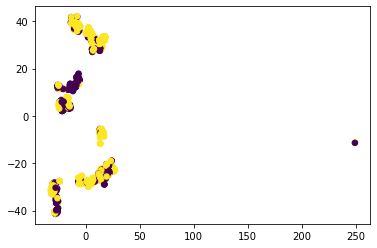

In [7]:
d = pairwise_distances(X)

Y = TSNE(perplexity=30,init='pca',learning_rate='auto').fit_transform(d)

pylab.scatter(Y[:,0],Y[:,1],30,df["log(IGC50-1)"])
pylab.show()